<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip Pedestrian.zip
!unzip Road.zip

Archive:  Pedestrian.zip
  inflating: Pedestrian/download (1).jpg  
  inflating: Pedestrian/download (2).jpg  
  inflating: Pedestrian/download (3).jpg  
  inflating: Pedestrian/download (4).jpg  
  inflating: Pedestrian/download (5).jpg  
  inflating: Pedestrian/download (6).jpg  
  inflating: Pedestrian/download.jpg  
  inflating: Pedestrian/images (1).jpg  
  inflating: Pedestrian/images (10).jpg  
  inflating: Pedestrian/images (11).jpg  
  inflating: Pedestrian/images (12).jpg  
  inflating: Pedestrian/images (13).jpg  
  inflating: Pedestrian/images (14).jpg  
  inflating: Pedestrian/images (15).jpg  
  inflating: Pedestrian/images (16).jpg  
  inflating: Pedestrian/images (17).jpg  
  inflating: Pedestrian/images (18).jpg  
  inflating: Pedestrian/images (19).jpg  
  inflating: Pedestrian/images (2).jpg  
  inflating: Pedestrian/images (20).jpg  
  inflating: Pedestrian/images (21).jpg  
  inflating: Pedestrian/images (22).jpg  
  inflating: Pedestrian/images (23).jpg  
  inflat

In [ ]:
from PIL import Image
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
#image data shape(n, width, height, rgb)


x = []#images
y = []#categories

folder_ped = 'Pedestrian'
folder_road = 'Road'


name_encode = {'Pedestrian':0, 'Road':1}

def images_to_array(folder, name):
  for image in os.listdir(folder):
   loaded_image = Image.open(os.path.join(folder,image))
   resized_image = Image.Image.resize(loaded_image, [100,100])
   image_array = np.array(resized_image)
   x.append(image_array)
   
   y.append(name_encode[name])
   
   image_flipped = cv2.flip(image_array, 1)
   x.append(image_flipped)
   y.append(name_encode[name])

   image_blurred = cv2.blur(image_array,(2,2))
   x.append(image_blurred)
   y.append(name_encode[name])

   image_flipped_blurred = cv2.blur(image_flipped, (2,2))
   x.append(image_flipped_blurred)
   y.append(name_encode[name])

def show_image(index):
   plt.imshow(x[index])
   plt.show()
   print(y[index])


images_to_array(folder_ped, 'Pedestrian')
images_to_array(folder_road, 'Road')
y = to_categorical(y, num_classes=2)
x = (np.array(x) -127.5)/127.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


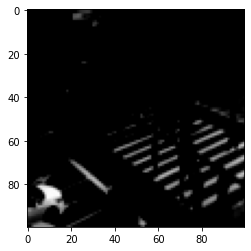

[1. 0.]


In [ ]:
show_image(6)

In [ ]:
from keras.layers import Activation, Softmax, Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 100)       80100     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 25, 25, 100)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 100)       250100    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 100)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 14400)            

In [ ]:
print(y[0])

[1. 0.]


In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

Train on 360 samples, validate on 40 samples
Epoch 1/10
360/360 [==============================] - 20s 54ms/step - loss: 0.3101 - accuracy: 0.8917 - val_loss: 0.1693 - val_accuracy: 0.9250
Epoch 2/10
360/360 [==============================] - 19s 53ms/step - loss: 0.2784 - accuracy: 0.9306 - val_loss: 0.1626 - val_accuracy: 0.9250
Epoch 3/10
360/360 [==============================] - 19s 53ms/step - loss: 0.0626 - accuracy: 0.9750 - val_loss: 0.1177 - val_accuracy: 0.9500
Epoch 4/10
360/360 [==============================] - 19s 53ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 5/10
360/360 [==============================] - 19s 53ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/10
360/360 [==============================] - 19s 52ms/step - loss: 0.0042 - accuracy: 0.9972 - val_loss: 0.0211 - val_accuracy: 0.9750
Epoch 7/10
360/360 [==============================] - 19s 53ms/step - loss: 0.0288 - accura

No handles with labels found to put in legend.


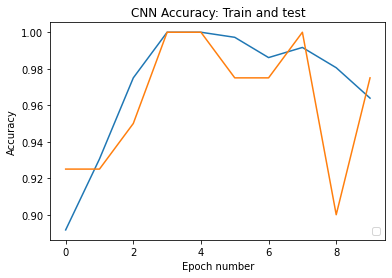

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x_train,y_train, batch_size=10, epochs=10, validation_data=(x_test, y_test))
model.save('road_pedestrain_CNN.h5')


plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('CNN Accuracy: Train and test')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction: pedestrian


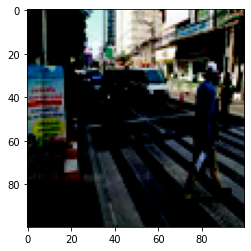

In [ ]:
from keras.models import load_model
model = load_model('road_pedestrain_CNN.h5')

def prediction(index_number):
  img = (np.array(x[index_number]) - 127.5)/127.5
  img = img.reshape(1,100,100,3)
  prediction = model.predict_classes(img)
  if prediction == 1:
    print('Prediction: pedestrian')
  elif prediction == 0:
    print('Prediction: road')
  else:
    print('Not 1 or 0, Take a look')
  plt.imshow(x[index_number])
  plt.show
prediction(137)

Prediction: pedestrian


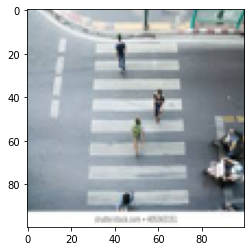

In [ ]:
model = load_model('road_pedestrain_CNN.h5')

def prediction(image_path):
  img_loaded = Image.open(image_path)
  img_resized = Image.Image.resize(img_loaded, (100,100))
  img = (np.array(img_resized) - 127.5)/127.5
  img = img.reshape(1,100,100,3)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: pedestrian')
  elif predictino == 1:
    print('Prediction: road')
  else:
    print('Not 1 or 0, Take a look')
  plt.imshow(img_resized)
  plt.show
prediction('/content/Pedestrian/images (34).jpg')